## IMDB Sentiment Analysis

**Github:** https://github.com/TrangNguyen95/NeuralNetwork

Model purpose is to reach the best possible accuracy for predicting whether a review was positive or negative.  

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Import Data

In [2]:
from keras.datasets import imdb


Using TensorFlow backend.


Data details can be found at: https://keras.io/datasets/

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

17465344/17464789 [==============================] - 36s 2us/step


In [4]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

### EDA

In [5]:
print("Data shape: ")
print(X.shape)
print(y.shape)

Data shape: 
(50000,)
(50000,)


In [6]:
print("Classes: ")
print(np.unique(y))

Classes: 
[0 1]


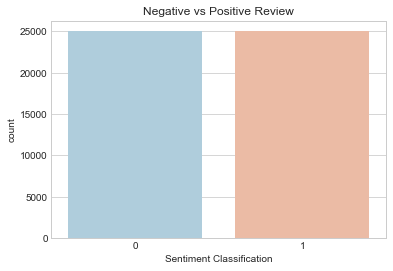

In [7]:
y_df=pd.DataFrame({'y':y})
y_df

sns.set_style('whitegrid')
sns.countplot(x='y',data=y_df,palette='RdBu_r')
plt.title('Negative vs Positive Review')
plt.xlabel('Sentiment Classification')
plt.show()

From this, we can see that the data has 50,000 records with binary classification (positive vs negative sentiment).
The graph shows that negative and positive reviews are balanced.

In [8]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))


Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


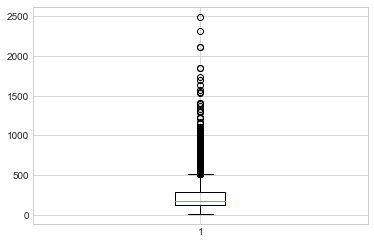

In [9]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

### Embedding

In [10]:
# Creating 32×500 matrix
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding

imdb.load_data(nb_words=5000)


X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


Embedding(5000, 32, input_length=500)

C:\Users\Trang\Anaconda3\lib\site-packages\keras\datasets\imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


### Simple Multi-Layer Perceptron Model 

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [12]:
# load the dataset but only keep the top 5000 words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)


In [13]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)


In [14]:
# create the model
MLmodel = Sequential()
MLmodel.add(Embedding(top_words, 32, input_length=max_words))
MLmodel.add(Flatten())
MLmodel.add(Dense(250, activation='relu'))
MLmodel.add(Dense(1, activation='sigmoid'))
MLmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(MLmodel.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
# Fit the model
MLmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Evaluation of the model
MLscores = MLmodel.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (MLscores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 43s - loss: 0.5081 - acc: 0.7120 - val_loss: 0.3356 - val_acc: 0.8517
Epoch 2/2
 - 42s - loss: 0.1910 - acc: 0.9273 - val_loss: 0.3004 - val_acc: 0.8732
Accuracy: 87.32%


### One-Dimensional Convolutional Neural Network Model 

In [16]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [17]:
# create the model
ODmodel = Sequential()
ODmodel.add(Embedding(top_words, 32, input_length=max_words))
ODmodel.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
ODmodel.add(MaxPooling1D(pool_size=2))
ODmodel.add(Flatten())
ODmodel.add(Dense(250, activation='relu'))
ODmodel.add(Dense(1, activation='sigmoid'))
ODmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(ODmodel.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fit the model
ODmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
ODscores = ODmodel.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (ODscores[1]*100))


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 51s - loss: 0.4355 - acc: 0.7746 - val_loss: 0.2785 - val_acc: 0.8838
Epoch 2/2
 - 53s - loss: 0.2076 - acc: 0.9186 - val_loss: 0.2948 - val_acc: 0.8758
Accuracy: 87.58%


### Long Short-Term Memory (LSTM) - Convolutional Neural Networks model

In [19]:
from keras.layers import LSTM 
from keras.layers import Convolution1D
from keras.layers import Dropout


In [20]:
max_review_length = 500
embedding_vecor_length = 32
LSTMmodel = Sequential()
LSTMmodel.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
LSTMmodel.add(Convolution1D(64, 3, padding='same'))
LSTMmodel.add(Convolution1D(32, 3, padding='same'))
LSTMmodel.add(Convolution1D(16, 3, padding='same'))
LSTMmodel.add(Flatten())
LSTMmodel.add(Dropout(0.2))
LSTMmodel.add(Dense(180,activation='sigmoid'))
LSTMmodel.add(Dropout(0.2))
LSTMmodel.add(Dense(1,activation='sigmoid'))
LSTMmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [23]:
# Fit the model
LSTMmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Evaluation of the model
LSTMscores = LSTMmodel.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (LSTMscores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 123s - loss: 0.3729 - acc: 0.8257 - val_loss: 0.2871 - val_acc: 0.8797
Epoch 2/2
 - 112s - loss: 0.2290 - acc: 0.9084 - val_loss: 0.3304 - val_acc: 0.8608
Accuracy: 86.08%


### Logistic model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
Lmodel= LogisticRegression()
# Fit the model
Lmodel.fit(X_train, y_train)
# Evaluation of the model
Lscores = Lmodel.score(X_test, y_test)

In [26]:
print("Accuracy: %.2f%%" % (Lscores*100))

Accuracy: 50.85%


### Summary

In [28]:
Model=(['Simple Multi-Layer','One-Dimensional CNN','LSTM CNN','Logistic'])
ScoreList=([MLscores[1],ODscores[1],LSTMscores[1],Lscores])
Score_df=pd.DataFrame({'Score':ScoreList},index=Model)

In [29]:
Score_df

,Score
Simple Multi-Layer,0.87320
One-Dimensional CNN,0.87576
LSTM CNN,0.86084
Logistic,0.50848


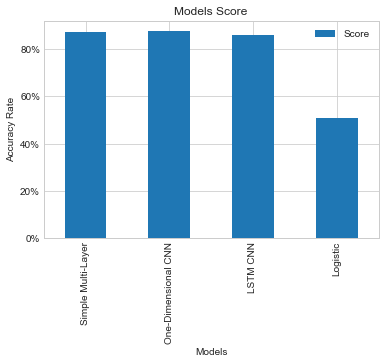

In [30]:
Score_df.plot.bar()
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.ylabel('Accuracy Rate')
plt.xlabel('Models')
plt.title('Models Score')
plt.show()

From the Graph and Score Table Above, we can see that One-Dimensional Convolutional Neural Networks model has the highest accuracy rate.  